### Import libraries

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

import os
os.chdir('2017')
os.getcwd()

'/home/luis/sandbox/projects/hashcode/2017'

### Parse input

In [12]:
DATASET_URL = 'input/me_at_the_zoo.in'

class Input:
    def __init__(self):
        self.cursor = 0
        
    def parse(self):
        header = self.parse_header()
        videos = self.parse_videos()
        network = self.parse_network(header['E'])
        requests = self.parse_requests(header['R'], videos)

        return [header, videos, network, requests]

    def parse_header(self):
        V, E, R, C, X = self.read_next_row().iloc[0]
        return {
            'V': V,
            'E': E,
            'R': R,
            'C': C,
            'X': X
        }

    def parse_videos(self):
        videos = self.read_next_row().transpose()
        videos.columns = ['size']
        return videos

    def parse_network(self, E):
        # network = pd.DataFrame([], columns=['endpoint', 'server', 'latency', 'gain'])
        
        network = self.read_rows()
        # network.columns = ['endpoint', 'server', 'latency', 'gain']
        
        for e in np.arange(0, E):
            ld, k = self.read_next_row().iloc[0]
            network = network.append({'endpoint': e, 'server': 'datacenter', 'latency': ld, 'gain': 0}, ignore_index=True)
            for i in np.arange(0, k):
                c, lc = self.read_next_row().iloc[0]
                network = network.append({'endpoint': e, 'server': c, 'latency': lc, 'gain': ld - lc}, ignore_index=True)

        return network

    def parse_requests(self, R, videos):
        requests = pd.DataFrame([], columns=['video_id', 'video_size', 'endpoint_id', 'count'])
        for r in np.arange(0, R):
            video_id, endpoint_id, count = self.read_next_row().iloc[0]
            video_size = videos.iloc[video_id]['size']
            requests = requests.append({'video_id': video_id, 'video_size': video_size, 'endpoint_id': endpoint_id, 'count': count}, ignore_index=True)    

        return requests
    
    def read_rows(self, amount=1):
        read = pd.read_csv(DATASET_URL, sep=' ', skiprows=self.cursor, nrows=amount, header=None)
        self.cursor += len(read)
        return read
        
    def read_next_row(self):
        return self.read_rows()

header, videos, network, requests = Input().parse()

ValueError: too many values to unpack (expected 2)

In [6]:
print(header)

{'V': 100, 'E': 10, 'R': 100, 'C': 10, 'X': 100}


In [10]:
videos.describe().T

count   mean        std  min    25%   50%   75%   max
size  100.0  24.88  15.024075  1.0  11.75  24.5  39.0  50.0

In [4]:
requests.describe()

video_id  video_size  endpoint_id  count
count        100         100          100    100
unique        36          25           10     96
top            0          20            8    300
freq          21          22           14      2

In [5]:
network.describe()

endpoint      server  latency  gain
count         42          42       42    42
unique        10          11       42    32
top            9  datacenter       62     0
freq           6          10        1    10

In [6]:
requests.describe()

video_id  video_size  endpoint_id  count
count        100         100          100    100
unique        36          25           10     96
top            0          20            8    300
freq          21          22           14      2

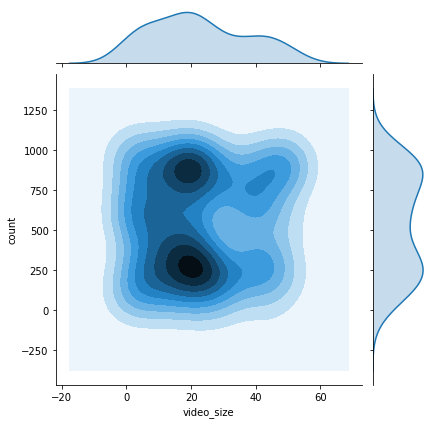

In [7]:
# g = sns.scatterplot(data=network, x='endpoint', y='latency')
# sns.scatterplot(data=network, x='endpoint', y='gain', ax=g)
g = sns.jointplot(x=requests['video_size'], y=requests['count'], kind="kde")
print(g)

In [15]:
server = 0
df = network
print(df[df.server == server])

   endpoint server latency gain
1         0      0     170  843
5         1      0       7  689
21        5      0      26  295
